# Рубежная контрольная работа

*Эту работу выполнять не обязательно. Баллы, набранные за эту контрольную работу просуммируются с баллами, которые будут набраны за контрольную работу 2 и выставлены как оценка за экзамен "автоматом". Если вы не выполните эту работу, переписать её будет невозможно, просто приходите на экзамен и добирайте баллы там.*

Сделайте копию ноутбука

Присвойте переменной `v` свой табельный номер ИСУ, это нужно для определения вашего варианта. Запустите код в следующей ячейке.

In [1]:
from datetime import datetime

current_datetime = datetime.now()
print(current_datetime)
v = 311530  # по умолчанию вписан мой номер

2022-10-24 11:50:54.975988


## Описание метрического алгоритма

Пусть задана обучающая выборка пар "объект-ответ" $X^m = \{(x_1,y_1),\dots,(x_m,y_m)\}.$

Пусть на множестве объектов задана функция расстояния $\rho(x,x')$. Чем больше значение этой функции, тем менее схожими являются два объекта $x, x'$. 
В простейшем случае используется евклидова метрика: $\rho(x,x') = \sqrt {\sum _{i=1}^{n}(x_{i}-x'_{i})^{2}}$,

Для произвольного объекта $u$ расположим объекты обучающей выборки $x_i$ в порядке возрастания расстояний до $u$:

$$\rho(u,x_{1; u}) \leq  \rho(u,x_{2; u}) \leq \cdots \leq \rho(u,x_{m; u}),$$
где через $x_{i; u}$ обозначается тот объект обучающей выборки, который является $i$-м соседом объекта $u$. Аналогичное обозначение введём и для ответа на $i$-м соседе: $y_{i; u}$. Таким образом, произвольный объект $u$ порождает свою перенумерацию выборки. В наиболее общем виде алгоритм ближайших соседей есть:
$$a(u) = \mathrm{arg}\max_{y\in Y} \sum_{i=1}^m \bigl[ y_{i; u}=y \bigr] w(i,u),$$
где $w(i,u)$ - заданная весовая функция, которая оценивает степень важности $i$-го соседа для классификации объекта $u$. Естественно полагать, что эта функция не отрицательна и не возрастает по $i$ (поскольку чем дальше объект, тем меньший вклад он должен вносить в пользу своего класса).

По-разному задавая весовую функцию, можно получать различные варианты метода ближайших соседей.

$w(i,u) = [i=1]$ - простейший метод ближайшего соседа;

$w(i,u) = [i\leq k]$ - метод $k$ ближайших соседей;

$w(i,u) = [i\leq k] q^i$ - метод $k$ экспоненциально взвешенных ближайших соседей, где предполагается константа $q < 1$




**Использование ядер сглаживания**

Для избежания неоднозначности ответа при классификации в качестве весовой функции $w(i, u)$ используют функцию ядра $K(r)$

Примеры ядер:

Triangular: ${\displaystyle K(r)=(1-|r|)}$,

Parabolic: ${\displaystyle K(r)={\frac {3}{4}}(1-r^{2})}$,

Tricube: ${\displaystyle K(r)={\frac {70}{81}}(1-{\left|r\right|}^{3})^{3}}$.

**Метод парзеновского окна**

Алгоритм $k$ ближайших соседей можно обобщить с помощью функции ядра. Рассмотрим два способа, которыми это можно сделать.

Метод парзеновского окна фиксированной ширины  $h$:
$$w(i,u) = K\biggl(\frac{\rho(u,x_{i; u})}{h}\biggr)$$

Метод парзеновского окна переменной ширины:
$$w(i,u) = K\biggl(\frac{\rho(u,x_{i; u})}{\rho(u,x_{k+1; u})}\biggr)$$

Таким образом классификаторы, полученные при использовании этих методов, можно записать в следующем виде

Фиксированной ширины: $$a_h = a(u, X^m, \boldsymbol{h}, K) = \mathrm{arg}\max_{y\in Y} \sum_{i=1}^m \bigl[ y_{i; u}=y \bigr] K\biggl(\frac{\rho(u,x_{i; u})}{h}\biggr)$$

Переменной ширины (фиксированное число соседей): 
$$a_k = a(u, X^m, \boldsymbol{k}, K) = \mathrm{arg}\max_{y\in Y} \sum_{i=1}^m \bigl[ y_{i; u}=y \bigr] K\biggl(\frac{\rho(u,x_{i; u})}{\rho(u,x_{k+1; u})}\biggr)$$


## Задание 1 (7 баллов)

В задании требуется написать свою реализацию метрического алгоритма. 

В качестве расстояния между объектами в этом задании используйте евклидово расстояние. 

В качестве функции ядра используйте Parabolic.

Для выбора варианта, запустите код в следующей ячейке



In [2]:
if (int(str(v)[3]) % 2) == 0:
    print(
        '1.1 В алгоритме число соседей должно быть фиксированным. Настроить гиперпараметр k, для оценки качества использовать F1-меру'
    )
else:
    print(
        '1.1 В алгоритме число соседей не должно быть фиксированным. Настроить гиперпараметр h (ширина окна),'
        'для оценки качества использовать использовать accuracy'
    )

if (int(str(v)[3]) % 2) == 0:
    print('1.2 Построить график зависимости метрики качества на обучающей выборке от k')
else:
    print('1.2 Построить график зависимости метрики качества на контрольной выборке от h')

1.1 В алгоритме число соседей не должно быть фиксированным. Настроить гиперпараметр h (ширина окна), для оценки качества использовать использовать accuracy
1.2 Построить график зависимости метрики качества на контрольной выборке от h


In [13]:
from scipy.spatial.distance import euclidean
from collections import Counter
import numpy as np


class KNN:
    def __init__(self, k=5, h=0.5):
        self.k = k
        self.h = h

    def fit(self, X, y):
        self.X = X
        self.y = y

    @staticmethod
    def parabolic(x):
        return 3 / 4 * (1 - x ** 2)

    def predict(self, X):
        return np.array([self._predict_one(x) for x in X])

    def _predict_one(self, x):
        distances = np.array([euclidean(x, x_train) for x_train in self.X])
        weights = self.parabolic(distances / self.h)
        most_common = Counter(self.y[np.argsort(weights)[-self.k:]]).most_common(1)
        return most_common[0][0]

    def accuracy(self, X, y):
        tp, tn, fp, fn = 0, 0, 0, 0
        for x, y_true in zip(X, y):
            y_pred = self._predict_one(x)
            tp += (y_true == 1 and y_pred == 1)
            tn += (y_true == 0 and y_pred == 0)
            fp += (y_true == 0 and y_pred == 1)
            fn += (y_true == 1 and y_pred == 0)

        return (tp + tn) / (tp + tn + fp + fn)


Протестирйуте эту реализацию на наборе данных breast_cancer:

https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html

Может понадобиться предобработка данных

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer

data = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.3, random_state=42)

knn = KNN(k=5, h=0.5)
knn.fit(X_train, y_train)

print(knn.accuracy(X_test, y_test))

0.9590643274853801


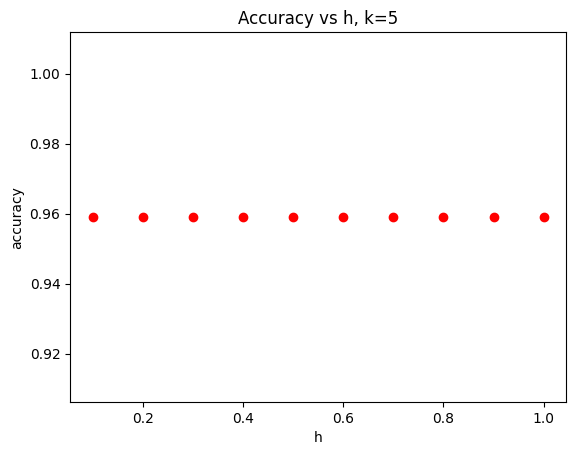

In [26]:
# plot accuracy vs k vs h

import matplotlib.pyplot as plt

h_values = np.linspace(0.1, 1, 10)

for h in h_values:
    knn = KNN(h=h)
    knn.fit(X_train, y_train)
    plt.plot(h, knn.accuracy(X_test, y_test), 'ro')

plt.xlabel('h')
plt.ylabel('accuracy')
plt.title('Accuracy vs h, k=5')
plt.show()

Штрафы:
* отсутствие реализации алгоритма (4 балла)
* ошибки в реализации алгоритма (2 балла)
* отсутствие настройки гиперпараметра (2 балла)
* ошибки в настройке гиперпараметра (1 балл)
* отсутствие графика (1 балл)

# Задание 2 (4 балла)

Требуется реализовать метрический алгоритм для предсказания действительного числа (то есть как в задаче регрессии, а не как в задаче классификации). 

В задании 2 **не** используйте ядра и метод парзеновского окна.

Во этом задании в качестве исходных данных используется словарь кинокритиков и выставленных ими оценок

In [27]:
critics = {
    'Lisa Rose': {
        'Lady in the Water': 2.5,
        'Snakes on a Plane': 3.5,
        'Just My Luck': 3.0,
        'Superman Returns': 3.5,
        'You, Me and Dupree': 2.5,
        'The Night Listener': 3.0
    },
    'Gene Seymour': {
        'Lady in the Water': 3.0,
        'Snakes on a Plane': 3.5,
        'Just My Luck': 1.5,
        'Superman Returns': 5.0,
        'The Night Listener': 3.0,
        'You, Me and Dupree': 3.5
    },
    'Michael Phillips': {
        'Lady in the Water': 2.5,
        'Snakes on a Plane': 3.0,
        'Superman Returns': 3.5,
        'The Night Listener': 4.0},
    'Claudia Puig': {
        'Snakes on a Plane': 3.5,
        'Just My Luck': 3.0,
        'The Night Listener': 4.5,
        'Superman Returns': 4.0,
        'You, Me and Dupree': 2.5
    },
    'Mick LaSalle': {
        'Lady in the Water': 3.0,
        'Snakes on a Plane': 4.0,
        'Just My Luck': 2.0,
        'Superman Returns': 3.0,
        'The Night Listener': 3.0,
        'You, Me and Dupree': 2.0
    },
    'Jack Matthews': {
        'Lady in the Water': 3.0,
        'Snakes on a Plane': 4.0,
        'The Night Listener': 3.0,
        'Superman Returns': 5.0,
        'You, Me and Dupree': 3.5
    },
    'Toby': {
        'Snakes on a Plane': 4.5,
        'You, Me and Dupree': 1.0,
        'Superman Returns': 4.0
    }
}

По этому словарю нужно сделать Dataframe в pandas. Строки это критики, столбцы - названия фильмов. На пересечении поставленные оценки. При отсуствии оценки у критика за фильм в датафрейме нужно поставить 0.

Для выбора варианта, запустите код в следующей ячейке

In [28]:
if (int(str(v)[4]) % 2) == 0:
    print('2.1 Сделайте предсказание оценок для критика Michael Phillips по фильмам, которые он ещё не видел')
else:
    print('2.1 Сделайте предсказание оценок для фильма Just My Luck по критикам, которые его ещё не видели')
print('2.2 Объясните как оценить качество полученного предказания')

2.1 Сделайте предсказание оценок для фильма Just My Luck по критикам, которые его ещё не видели
2.2 Объясните как оценить качество полученного предказания


In [30]:
import pandas as pd

critics_df = pd.DataFrame(critics)

critics_df = critics_df.fillna(0)
critics_df

,Lisa Rose,Gene Seymour,Michael Phillips,Claudia Puig,Mick LaSalle,Jack Matthews,Toby
Lady in the Water,2.5,3.0,2.5,0.0,3.0,3.0,0.0
Snakes on a Plane,3.5,3.5,3.0,3.5,4.0,4.0,4.5
Just My Luck,3.0,1.5,0.0,3.0,2.0,0.0,0.0
Superman Returns,3.5,5.0,3.5,4.0,3.0,5.0,4.0
"You, Me and Dupree",2.5,3.5,0.0,2.5,2.0,3.5,1.0
The Night Listener,3.0,3.0,4.0,4.5,3.0,3.0,0.0


In [33]:
# predict Just My Luck for critics who didn't see it

Штрафы:
* отсутствие реализации алгоритма (2 балла)
* ошибки в реализации алгоритма (1 балл)
* отсутствие тестирования алгоритма (1 балл)
* отсутствие объяснения оценки качества алгоритма (1 балл)

После завершения контрольной работы, дайте ссылку на ноутбук в отдельном followup в своей теме на Piazza. Дайте разрешение на его просмотр.

Не забудьте запустить код в последней ячейке для контроля времени выполнения.

In [34]:
current_datetime = datetime.now()
print(current_datetime)

2022-10-24 12:59:02.389276
